In [730]:
import pandas as pd
import re
import numpy as np
import datetime as dt
df = pd.read_csv("../data/attacks_clean.csv", encoding="Latin1")

# Visualizamos nuestra tabla

In [731]:
df.head()

,Unnamed: 0,Date_ok,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N)
0,0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N
4,4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


In [732]:
#Aparece una columna "Unnamed: 0" que eliminamos
df = df.drop(['Unnamed: 0'], axis=1)

In [733]:
df.head()

,Date_ok,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N)
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N


# Agrupamos por decadas

In [734]:
df["decada"] = pd.cut(df.Year,
                        bins=[1959,1969,1979,1989,1999,2009,2019], 
                        labels=range(1960,2020,10))

In [735]:
df.head()

,Date_ok,Year,Type,Country,Area,Location,Activity,Injury,Fatal (Y/N),decada
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,"No injury to occupant, outrigger canoe and pad...",N,2010
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Minor injury to left thigh,N,2010
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,Injury to left lower leg from surfboard skeg,N,2010
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,Minor injury to lower leg,N,2010
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Lacerations to leg & hand shark PROVOKED INCIDENT,N,2010


In [736]:
df["decada"].value_counts().reset_index().sort_values('index')

,index,decada
2,1960,618
5,1970,334
4,1980,434
3,1990,569
1,2000,1021
0,2010,1057


# Evolución de casos en las últimas decadas

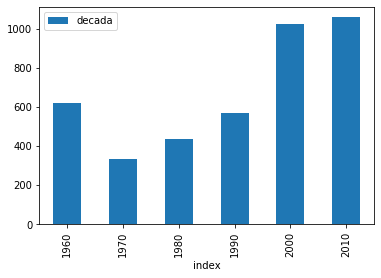

In [737]:
%matplotlib inline
data = df["decada"].value_counts().reset_index().sort_values('index')

data.plot.bar(x='index', y='decada')

# Distribución de casos por paises

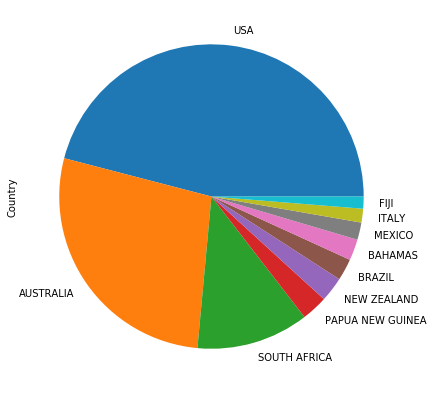

In [783]:
df.Country.value_counts()[0:10].plot.pie(figsize=(7,7))

# Distribución de casos por actividades

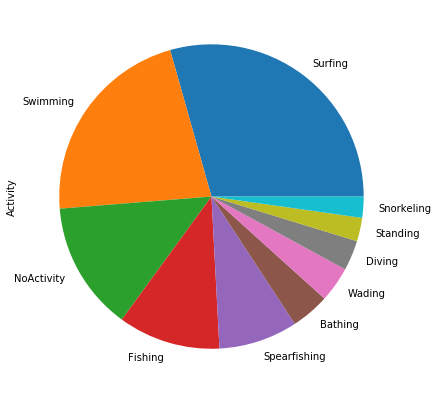

In [789]:
df.Activity.value_counts()[0:10].plot.pie(figsize=(7,7))

In [808]:
risk_sports = ["Surfing"]
df["surfing"] = np.where(df.Activity.isin(risk_sports), True, False)

In [813]:
df[["Activity", "surfing"]]

,Activity,surfing
0,Paddling,False
1,Standing,False
2,Surfing,True
3,Surfing,True
4,Free diving,False
...,...,...
6297,Diving,False
6298,Pearl diving,False
6299,Swimming,False
6300,NoActivity,False


# Hipótesis: El número de accidentes en surfistas ha aumentado en los últimos años

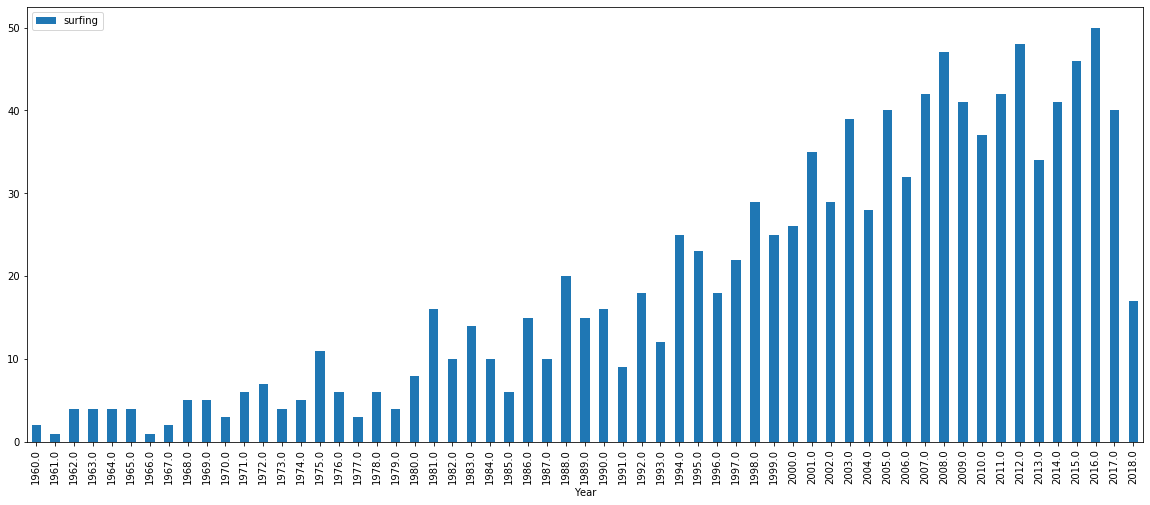

In [837]:
df[df.surfing].groupby(["Year"]).sum()[1960:2018].plot.bar(figsize=(20,8))

Como podemos observar, el número de ataques a surfistas ha crecido en los últimos años, tomando como referencia el periodo 1960-2018, teniendo en cuenta que el año 2018 solo tiene registros durante el primer semestre.